In [2]:
import sys
sys.path.append('..')

import os

from spp import process
from spp import market
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [16]:
ticker = "CMCSA"
def_pipe = process.BaselineBinPipeline(ticker, period="1y", window_size=12)
X_train, y_train, X_test, y_test = def_pipe.get_data()

[*********************100%***********************]  1 of 1 completed


C:\Users\valer\Desktop\SPP\SPP\model\..\spp\process.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_list[i][attribute_name+"_LnProf"] = lnprofs


## Logistic Regression

Model earned 112943.84$ out of 125333.99$ starting from 100000$ 
Train accuracy 0.55 
Test accuracy  0.56


C:\Users\valer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\valer\Desktop\SPP\SPP\model\..\spp\process.py:377: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price_True"] = self.true_price_keeper[train_test_id].to_numpy()


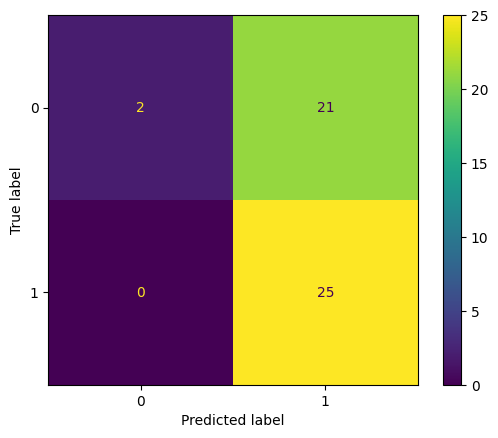

In [17]:
model = LogisticRegression().fit(X_train, y_train)
y_train_pred_bin = model.predict(X_train)
y_test_pred_bin = model.predict(X_test)

df = def_pipe.get_test_price(y_test_pred_bin)  # ! Prediction_ExpProf will not be corret as we 
                                               # ! proposed bin not price

start_capital = 100000
tt = market.BinTraderTest(start_capital, y_test_pred_bin, df["Price_True"])
bt = market.BinTraderTest(start_capital, y_test, df["Price_True"])
traded_capital = tt.trade()
maximal_caital = bt.trade()
print(f"Model earned {(traded_capital):.2f}$ out of {maximal_caital:.2f}$ starting from {start_capital}$ ")

print(f"Train accuracy {model.score(X_train, y_train):.2f} \nTest accuracy  {model.score(X_test, y_test):.2f}")

_ = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_bin)

In [7]:
tickers = ["EBAY", "ALGN", "CMCSA"]
byt = market.BinYearTest(tickers, process.BaselineBinPipeline, end_date=None, window_size=15)

In [8]:
orig_stdout = sys.stdout
orig_stderr = sys.stderr
f = open(os.devnull, 'w')
sys.stdout = f
sys.stderr = f
year_test_df = byt.trade(model)
sys.stdout = orig_stdout
sys.stderr = orig_stderr

In [19]:
pd.options.display.float_format = '{:,.2f}'.format
year_test_df

,Month,TrainAcc,TestAcc,Income,Potential
0,May_2022,0.56,0.48,0.98,-0.16
1,Jun_2022,0.53,0.55,1.00,-0.03
2,Jul_2022,0.54,0.41,1.00,0.00
3,Aug_2022,0.54,0.50,0.98,-0.17
4,Sep_2022,0.55,0.58,0.99,-0.06
5,Oct_2022,0.56,0.48,1.00,0.00
6,Nov_2022,0.56,0.45,1.00,0.00
7,Dec_2022,0.58,0.48,1.01,0.10
8,Jan_2023,0.54,0.38,1.00,0.00
9,Feb_2023,0.54,0.58,0.99,-0.25


In [10]:
year_test_df.mean()

C:\Users\valer\AppData\Local\Temp\ipykernel_11336\561746647.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  year_test_df.mean()


TrainAcc     0.546734
TestAcc      0.491813
Income       0.997606
Potential   -0.031789
dtype: float64

In [11]:
from functools import reduce
items = list(year_test_df["Income"])
reduced_income = reduce(lambda a,b: a*b, items)
print("Year capital multiplier", reduced_income)

Year capital multiplier 0.9710823601163224
